# **TUTORIAL 3: DESIGN UNDER UNCERTAINTY**

Written by: Ghifari Adam Faza

Edited by: Pramudita Satria Palar

# Design Under Uncertainty

Welcome to this session. In this tutorial session we'll revisit some concepts that explained in the previous session by Prof. Lucia Parussini such as:
- Introduction into Uncertainty and Uncertainty Quantification.
- Monte Carlo simulation.
- Introduction to reliability analysis.
- Calculating probability of failure using Monte Carlo.
- Sensitivity analysis.
- Calculating sensitivity analysis using Sobol Indices.

---
---
## Uncertainty Quantification

---
### Uncertainty

<img src="https://www.upmatters.com/wp-content/uploads/sites/93/2020/03/3-30-7-Day-Forecast.png?w=1280" width= 600px;/>

[source](https://www.upmatters.com/wp-content/uploads/sites/93/2020/03/3-30-7-Day-Forecast.png?w=1280)

- You are measuring the length of a table. It reads 200 cm. Are you sure that the length of the table is **EXACTLY** 200 cm?
- You are measuring the weight a bottle of water. It reads 1.5 kg. Are you sure?
- It's been raining in the past 5 days. Are you sure that tomorrow will be raining?
- You get three 4s in a three consecutive dice draws. Are you sure that the next draw will be 4?

We often refers the situation above as an **UNCERTAIN** situation.
- Why we call it **Uncertain**?
- When does a situation is **Certain**?
- We have to know the **Information**
    - "Tomorrow will be raining" is an **Uncertain** statement. It's only a **Guess**, whether it's an educated guess or uneducated guess.
    - "Yesterday was raining" is a **Certain** statement. We know the information. It's a **Fact**.

---
#### Sources of Uncertainty

Some of the uncertainty sources:
- Experimental uncertainty: Variability of experimental measurements.
- Model Bias: Inadequacy of the model to simulate the real problem. Example: weather forecast.
- Parametric Variability: Comes from the input of the model. Example: variability in the ambient condition may affect the performance of a machine.
- etc

---
#### Aleatoric and Epistemic Uncertainty

- Aleatoric: Statistical uncertainty, representative of unknowns that differ each time when we run the same experiment. For example, uncertainty of a bridge load may vary time-to-time. We cannot reduce aleatoric uncertainty.
- Epistemic: Systematic uncertainty. For example when we calculating a parabolic trajectory we often neglect the air drag. Another example is the values that we typically use in a turbulence model. Epistemic uncertainty can be reduced with more knowledge.

<img src="https://www.researchgate.net/profile/Edoardo-Patelli/publication/279529942/figure/fig1/AS:294377567080448@1447196489229/Spectrum-of-Uncertainties-Irreducible-aleatory-uncertainty-due-to-intrinsically-random.png" width= 500px;/>

[source](https://www.researchgate.net/profile/Edoardo-Patelli/publication/279529942/figure/fig1/AS:294377567080448@1447196489229/Spectrum-of-Uncertainties-Irreducible-aleatory-uncertainty-due-to-intrinsically-random.png)


---
### Uncertainty Quantification

- As the name implies, UQ is the process of quantifying uncertainties.
- We want to see how the model responds when the inputs are uncertain (because the input is uncertain, the model output is also uncertain!)

<img src="https://www.biorxiv.org/content/biorxiv/early/2018/03/05/274779/F1.large.jpg" width= 500px;/>

[source](https://www.biorxiv.org/content/biorxiv/early/2018/03/05/274779/F1.large.jpg)

<img src="https://www.researchgate.net/profile/Gerta-Koester/publication/301857535/figure/fig10/AS:668586494418957@1536414850924/Illustration-of-the-forward-uncertainty-quantification-phases-assimilation-propagation.png" width= 500px;/>

[source](https://www.researchgate.net/profile/Gerta-Koester/publication/301857535/figure/fig10/AS:668586494418957@1536414850924/Illustration-of-the-forward-uncertainty-quantification-phases-assimilation-propagation.png)

How do we do that? Let's start by using Monte Carlo Simulation!


---
## Monte Carlo Method

<img src="https://lp-cms-production.imgix.net/2019-06/d6dbfeb4a839afa6e09adbe525674de3-casino-de-monte-carlo.jpg" width= 500px;/>

[source](https://lp-cms-production.imgix.net/2019-06/d6dbfeb4a839afa6e09adbe525674de3-casino-de-monte-carlo.jpg)

* Named after the popular gambling destination in Monaco.
* Monte Carlo use randomness to solve problems that might be deterministic 
* The methods may vary, depending on the problem, but they follow the folllowing particular patterns:
    * Define a domain of possible inputs
    * Generate inputs randomly from a probability distribution over the domain
    * Perform a deterministic computation on the inputs
    * Aggregate the results



---
Consider this classic Monte Carlo simulation example. Although not specifically in the context of UQ, this is a good example to illustrate Monte Carlo simulation.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Pi_30K.gif/220px-Pi_30K.gif" width= 400px;/>

[source](https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Pi_30K.gif/220px-Pi_30K.gif)

* In this problem we want to estimate the value of $\pi$ using the ratio between a unit square and the quadrant.
* We know that $A_{circle} = \frac{1}{4} \pi $ and $A_{square} = 1$
* Hence $\frac{A_{circle}}{A_{square}} = \frac{\pi}{4}$
* Now, with the given information, how do we estimate the pi?
    * Uniformly scatter a given number of points over the square.
    * Count the number of points inside the quadrant.
    * The ratio of the inside-count and the total sample is an estimate of $\frac{A_{circle}}{A_{square}}$.
    * Multiply the result by 4 to estimate $\pi$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def pi_est(n):
    """
    A function to estimate the value of pi, using Monte Carlo simulation

    Args:
        n (int): number of sample
    
    Return:
        pi (float): estimated pi value
    """

    # Uniform sampling 0 to 1
    points = np.random.uniform(size = (n,2))

    # A point within the quadrant should have distance <= 1 from the (0,0)
    distance = np.sqrt(points[:,0]**2 + points[:,1]**2)

    # Count the number of points with distance <= 1
    n_points_inside = np.sum(distance <= 1)

    # Calculate pi
    pi = 4 * n_points_inside / n

    return pi


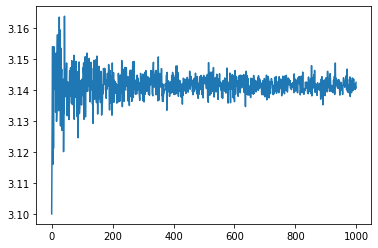

In [2]:
pi_list = []
for i in range(1000,1001000,1000):
    pi_list.append(pi_est(i))

plt.plot(pi_list)

---
Now how do we use Monte Carlo simulation for Uncertainty Quantification?

<img src="https://www.biorxiv.org/content/biorxiv/early/2018/03/05/274779/F1.large.jpg" width= 500px;/>

[source](https://www.biorxiv.org/content/biorxiv/early/2018/03/05/274779/F1.large.jpg)

* As the figure shown, instead of single input / parameter, the parameters are some kind of distributions.
* Then, we run a model.
* Then, we get the systems response w.r.t the uncertain inputs.

Simply put, we'll do **a lot** of simulation for each parameter distribution.



---
#### Case Study

Consider this example:

<img src="https://ascelibrary.org/cms/asset/c00ffb4d-c8ba-43d0-9b3c-2180c6995462/figure7.gif" width= 500px;/>

[source](https://ascelibrary.org/cms/asset/c00ffb4d-c8ba-43d0-9b3c-2180c6995462/figure7.gif)

* This is a two-dimensional bridge truss problem.
* The geometry is known deteministically as shown in the figure.
* However, the material properties are taken as a random variables with specific type of distribution.
* Hence, the problem has ten stochastic input variables / parameters, represented as vector $\boldsymbol{x}$

$$
\boldsymbol{x} = [E_1,E_2,A_1,A_2,P_1,P_2,P_3,P_4,P_5,P_6]^T
$$

* $E_1$ and $A_1$ represent the modulus of elasticity and cross-sectional area of horizontal bars.
* $E_2$ and $A_2$ represent the modulus of elasticity and cross-sectional area of diagonal bars.
* $P_1,\ldots,P_6$ are the vertical loads on the upper nodes as shown in the figure.
* Meanwhile the quantity of interest is the displacement of node $u$

| Design Variable |         | Distribution | Variable Mean                | Standard Deviation  |
|--------------------|---------|--------------|---------------------|---------------------|
| $E_1, E_2$         | $[Pa]$  | Lognormal    | $2.1 \cdot 10^{11}$ | $2.1 \cdot 10^{10}$ |
| $A_1$              | $[m^2]$ | Lognormal    | $2.0 \cdot 10^{-3}$ | $2.0 \cdot 10^{-4}$ |
| $A_2$              | $[m^2]$ | Lognormal    | $1.0 \cdot 10^{-3}$ | $1.0 \cdot 10^{-4}$ |
| $P_1, \ldots, P_6$ | $[N]$   | Gumbel       | $5.0 \cdot 10^{4}$  | $7.5 \cdot 10^{3}$  |

To model the bridge truss we'll use a python library called [anaStruct](https://github.com/ritchie46/anaStruct)

First, we'll need to install the library

In [3]:
!pip install anastruct

     |████████████████████████████████| 69 kB 5.8 MB/s 


In [4]:
#@title anastruct simulation
from anastruct import SystemElements


def trussbridge(Ediag, Adiag, Ebot, Abot, Etop, Atop, p, w_tri = 4, h_tri=2,num_tri=6, disp=False):
    """
    Calculate displacement of middle point in bridge truss
    Args:
         Ediag (list): list of Young's modulus for each pair of diagonal trusses (Pa)
         Adiag (list): list of cross-sectional area for each pair of diagonal trusses (m2)
         Ebot (list): list of Young's modulus for each bottom truss (Pa)
         Abot (list): list of cross-sectional area for each bottom truss (m2)
         Etop (list): list of Young's modulus for each top truss (Pa)
         Atop (list): list of cross-sectional area for each top truss (m2)t
         p (list): list of force applied on the top nodes (N)
         num_tri (int): number of triangles
         disp (bool): display image or not
    """
    
    Ediag = np.array(Ediag)
    Adiag = np.array(Adiag)
    Ebot = np.array(Ebot)
    Abot = np.array(Abot)
    Etop = np.array(Etop)
    Atop = np.array(Atop)
    EAdiag = Ediag * Adiag
    EAbot = Ebot * Abot
    EAtop = Etop * Atop

    ss = SystemElements()

    # Triangle coord
    x_base = np.arange(0,num_tri+1) * w_tri
    x_top = np.arange(0,num_tri) * w_tri + h_tri
    y = np.ones(num_tri) * h_tri

    # Create n triangles
    for i in range(num_tri):
        p1 = [x_base[i],0]
        p2 = [x_top[i],y[i]]
        p3 = [x_base[i+1],0]
        ss.add_truss_element(location=[p1, p2], EA=EAdiag[i])
        ss.add_truss_element(location=[p2, p3], EA=EAdiag[i])
        ss.add_truss_element(location=[p1, p3], EA=EAbot[i])

    # Create n-1 horizontal trusses
    for i in range(num_tri-1):
        ss.add_truss_element(location=[[x_top[i],y[i]], [x_top[i+1],y[i+1]]], EA=EAtop[i])

    # Create support
    ss.add_support_hinged(node_id=1)
    ss.add_support_roll(node_id=13, direction=2)

    # Create Load
    loadnode = [2,4,6,8,12]
    for index, point in enumerate(loadnode):
        ss.point_load(node_id=point,Fy=p[index])
        ss.point_load(node_id=point,Fy=p[index])
        ss.point_load(node_id=point,Fy=p[index])
        ss.point_load(node_id=point,Fy=p[index])

    ss.solve()
    disp7 = ss.get_node_displacements(node_id=7)

    if disp is True:
        ss.show_axial_force()
        ss.show_displacement(factor=10)

    return disp7

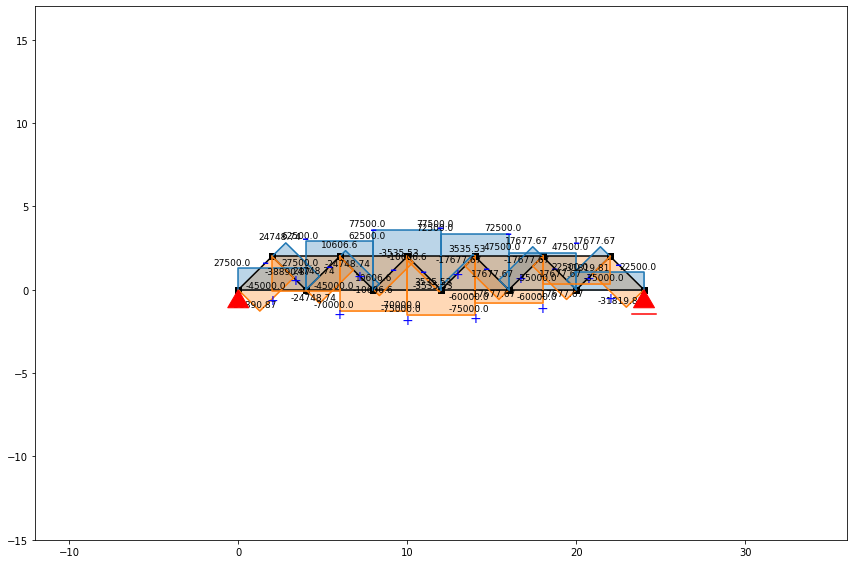

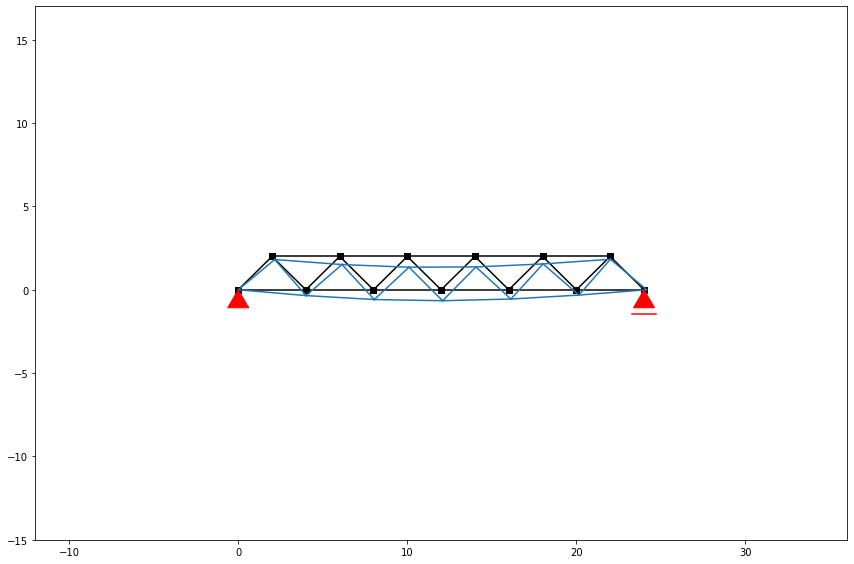

In [5]:
# Test the code
num_tri = 6
Ediag = np.ones(shape=num_tri) * 2e11
Adiag = np.ones(shape=num_tri) * 3e-4
Ebot = np.ones(shape=num_tri) * 2.2e11
Abot = np.ones(shape=num_tri) * 3.5e-4
Etop = np.ones(shape=num_tri-1) * 2.2e11
Atop = np.ones(shape=num_tri-1) * 3.5e-4
p = np.ones(shape=num_tri) * -1e4

mid_disp = trussbridge(Ediag,Adiag,Ebot,Abot,Etop,Atop,p,disp=True)

---
#### Monte Carlo Simulation

Now, we'll perform a Monte Carlo simulation for Uncertainty Quantification:
* First, as we know that the input parameters are in the form of distribution, we'll need to create the sample generation code.
* For illustration, we will use 3000 MCS samples (you can change it layer)

In [6]:
def mcpopgen(nmc=3e3, type="normal", ndim=2, stddev=1, mean=0, seed_num=None ):
    if seed_num is None:
        pass
    else:
        np.random.seed(seed_num)
    
    nmc = int(nmc)
    if type.lower() == "normal" or type.lower() == "gaussian":
        pop = stddev*np.random.randn(nmc,ndim)+mean
    elif type.lower() == "lognormal":
        var = stddev**2
        sigma = np.sqrt(np.log(var/(mean**2)+1))
        mu = np.log((mean**2)/np.sqrt(var + mean**2))
        pop = np.exp(sigma*np.random.randn(nmc,ndim)+mu)
    elif type.lower() == 'gumbel':
        beta = (stddev/np.pi) * np.sqrt(6)
        pop = np.random.gumbel(mean,beta,(nmc,ndim))
    else:
        raise ValueError("Monte Carlo sampling type not supported")
    return pop

* Now, we'll generate the random variable distribution

In [7]:
def randvars(seed = None, n = 3e3):
    E12 = mcpopgen(nmc = n, type="lognormal", ndim=2, stddev=2.1e10, mean=2.1e11, seed_num=seed)
    A1 = mcpopgen(nmc = n, type="lognormal", ndim=1, stddev=2e-4, mean=2e-3, seed_num=seed)
    A2 = mcpopgen(nmc = n, type="lognormal", ndim=1, stddev=1e-4, mean=1e-3, seed_num=seed)
    P = mcpopgen(nmc = n, type="gumbel", ndim=6, stddev=7.5e3, mean=5e4, seed_num=seed)
    x = np.hstack((E12, A1, A2, P))
    return x

In [8]:
x = randvars(seed = 5)
x.shape

(3000, 10)

* Let's see visualize some of the distributions

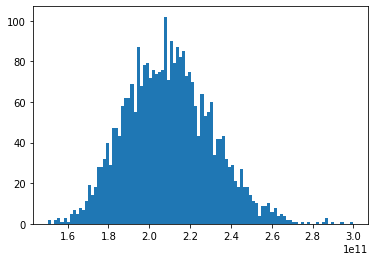

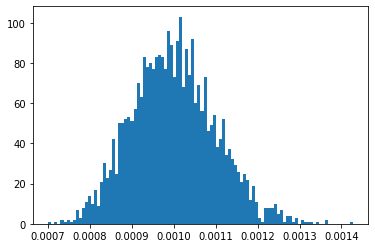

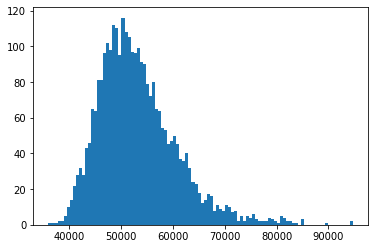

In [9]:
for i in [0,3,8]:
    plt.hist(x[:,i], bins=100)
    plt.show()

* Now, let's evaluate the system's output. This process might take a long time because we are calling a number of FEM simulations (each with different realization of the random input variables)

In [10]:
y = []
num_tri = 6
for ii in range(len(x)):
    if ii % 100 == 0 and ii != 0:
        print("eval number",ii)
    Ediag = np.ones(shape=num_tri) * x[ii,1]
    Adiag = np.ones(shape=num_tri) * x[ii,3]
    Ebot = np.ones(shape=num_tri) * x[ii,0]
    Abot = np.ones(shape=num_tri) * x[ii,2]
    Etop = np.ones(shape=num_tri - 1) * x[ii,0]
    Atop = np.ones(shape=num_tri - 1) * x[ii,2]
    p = -x[ii,4:10]
    res = trussbridge(Ediag,Adiag,Ebot,Abot,Etop,Atop,p)
    y.append(res['uy'])
y = np.array(y)

eval number 100
eval number 200
eval number 300
eval number 400
eval number 500
eval number 600
eval number 700
eval number 800
eval number 900
eval number 1000
eval number 1100
eval number 1200
eval number 1300
eval number 1400
eval number 1500
eval number 1600
eval number 1700
eval number 1800
eval number 1900
eval number 2000
eval number 2100
eval number 2200
eval number 2300
eval number 2400
eval number 2500
eval number 2600
eval number 2700
eval number 2800
eval number 2900


In UQ, we want to know the probability distribution of the output. So let's do just that by using ```plt.hist```. By knowing the distribution of the output, you will get better insight on how the random inputs affect the output:

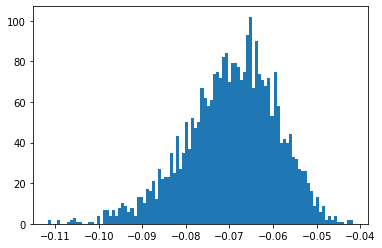

In [11]:
plt.hist(y, bins=100)
plt.show()

Typically, we want to know the statistical moments of the output. We can simply calculate the mean and variance (and also standard deviation) from the outputs of the simulation:

In [12]:
print(f"The mean of the output is {np.mean(y)}")
print(f"The variance of the output is {np.var(y)}")
print(f"The standard deviation of the output is {np.std(y)}")

The mean of the output is -0.06958857057190378
The variance of the output is 0.00010975647480984785
The standard deviation of the output is 0.010476472441134366


---
---
## Reliability Analysis

* In this tutorial session, we'll use an example of structural reliability analysis.
* Structural reliability analysis itself is quite broad.
* In this session we'll focus on how can we calculate (estimate) the value of structural reliability. To be exact, we will use **probability of failure** (an example of other possible measures is quantile).
* Simply put, reliability is defined as:
$$
reliability = 1 - PoF
$$

Now, what is PoF?
* Probability of Failure.
* It tells you the probability of your systems to fail. Given the various inputs condition.
* Failure probability can be defined as the probability that a model response $M(\boldsymbol{x})$ is smaller (or higher, depending on the context) than a given threshold $y_0$
* The failure probability may be recast as the following integral:

$$
P_f = \int_{D_f} f_{\mathbf{X}} (\boldsymbol{x}) d\boldsymbol{x}
$$

* $f_{\mathbf{X}}$ is the joint probability function of input vector $\mathbf{X}$
* $D_f$ is the failure domain, defined as:

$$
D_f = \{ \boldsymbol{x} \in D_{\mathbf{X}} : M(\boldsymbol{x}) \leq y_0 \}
$$

<img src="https://api.intechopen.com/media/chapter/68245/media/F1.png" width= 500px;/>

[source](https://api.intechopen.com/media/chapter/68245/media/F1.png)

How can we estimate PoF?
* Using Monte Carlo simulation, of course (but remember that there are other methods!).
* Let's assume a reasonably large sample of $\mathbf{X}$ denoted by $S = {x_1,\ldots,x_n}$.
* Then, the failure probability can be estimated by:

$$
\hat{P_f} = \frac{n_{fail}}{n} = \frac{1}{n} \sum_{i=1}^n \mathbb{I}_{M(x_i) \leq y_0}
$$

* $n_f$ is the number of failure samples, $n$ is the total number of samples.
* $\mathbb{I}_{M(x_i) \leq y_0}$ is an indicator function
    * The value will be 1 if the sample fail.
    * Otherwise, 0

* The "accuracy" of this estimate the failure probability can be measured by the coefficient of variation:

$$
C.O.V_{\hat{P_f}} = \sqrt{\frac{1 - \hat{P_f}}{n \cdot \hat{P_f}}}
$$


---
#### Case Study

Now, let's revisit our last test case, the bridge truss problem.

<img src="https://ascelibrary.org/cms/asset/c00ffb4d-c8ba-43d0-9b3c-2180c6995462/figure7.gif" width= 500px;/>

[source](https://ascelibrary.org/cms/asset/c00ffb4d-c8ba-43d0-9b3c-2180c6995462/figure7.gif)

* This is a two-dimensional bridge truss problem.
* The geometry is known deteministically as shown in the figure.
* However, the material properties are taken as a random variables with specific type of distribution.
* Hence, the problem has ten stochastic input variables / parameters, represented as vector $\boldsymbol{x}$

$$
\boldsymbol{x} = [E_1,E_2,A_1,A_2,P_1,P_2,P_3,P_4,P_5,P_6]^T
$$

* $E_1$ and $A_1$ represent the modulus of elasticity and cross-sectional area of horizontal bars.
* $E_2$ and $A_2$ represent the modulus of elasticity and cross-sectional area of diagonal bars.
* $P_1,\ldots,P_6$ are the vertical loads on the upper nodes as shown in the figure.
* Meanwhile the quantity of interest is the displacement of node $u$

| Design Variable |         | Distribution | Variable Mean                | Standard Deviation  |
|--------------------|---------|--------------|---------------------|---------------------|
| $E_1, E_2$         | $[Pa]$  | Lognormal    | $2.1 \cdot 10^{11}$ | $2.1 \cdot 10^{10}$ |
| $A_1$              | $[m^2]$ | Lognormal    | $2.0 \cdot 10^{-3}$ | $2.0 \cdot 10^{-4}$ |
| $A_2$              | $[m^2]$ | Lognormal    | $1.0 \cdot 10^{-3}$ | $1.0 \cdot 10^{-4}$ |
| $P_1, \ldots, P_6$ | $[N]$   | Gumbel       | $5.0 \cdot 10^{4}$  | $7.5 \cdot 10^{3}$  |

Now, let's add a problem:
* The bridge structure can be categorized as "failed" when the deflection of point $u$ is more than 10cm downward. Mathematically, $u \leq -0.1 m$.
* For this purpose, we could reuse the previous code.

Let's generate a monte carlo simulation for different seed

In [13]:
x = randvars(seed = 25)
x.shape

(3000, 10)

Let's run the simulation!

In [14]:
y = []
num_tri = 6
for ii in range(len(x)):
    if ii % 100 == 0 and ii != 0:
        print("eval number",ii)
    Ediag = np.ones(shape=num_tri) * x[ii,1]
    Adiag = np.ones(shape=num_tri) * x[ii,3]
    Ebot = np.ones(shape=num_tri) * x[ii,0]
    Abot = np.ones(shape=num_tri) * x[ii,2]
    Etop = np.ones(shape=num_tri - 1) * x[ii,0]
    Atop = np.ones(shape=num_tri - 1) * x[ii,2]
    p = -x[ii,4:10]
    res = trussbridge(Ediag,Adiag,Ebot,Abot,Etop,Atop,p)
    y.append(res['uy'])
y = np.array(y)

eval number 100
eval number 200
eval number 300
eval number 400
eval number 500
eval number 600
eval number 700
eval number 800
eval number 900
eval number 1000
eval number 1100
eval number 1200
eval number 1300
eval number 1400
eval number 1500
eval number 1600
eval number 1700
eval number 1800
eval number 1900
eval number 2000
eval number 2100
eval number 2200
eval number 2300
eval number 2400
eval number 2500
eval number 2600
eval number 2700
eval number 2800
eval number 2900


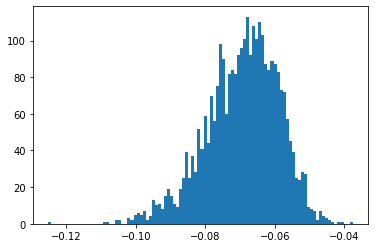

In [15]:
plt.hist(y, bins=100)
plt.show()

* Now, as stated in the problem, the structure is failed when $u \leq -0.1$. Hence

In [16]:
n_fail = np.sum(y <= -0.1)
n_fail

15

In [17]:
n = len(y)
P_f = n_fail / n
COV = np.sqrt((1-P_f)/(n*P_f))
print(f'Failure Probability: {P_f}')
print(f'Coeff of Variation: {COV}')

Failure Probability: 0.005
Coeff of Variation: 0.25755258362775807


Let's make variation on the monte carlo sampling number

In [18]:
def run_sim(x):
    y = []
    num_tri = 6
    for ii in range(len(x)):
        if (ii+1) % 500 == 0 and ii != 0:
            print("eval number",ii+1)
        Ediag = np.ones(shape=num_tri) * x[ii,1]
        Adiag = np.ones(shape=num_tri) * x[ii,3]
        Ebot = np.ones(shape=num_tri) * x[ii,0]
        Abot = np.ones(shape=num_tri) * x[ii,2]
        Etop = np.ones(shape=num_tri - 1) * x[ii,0]
        Atop = np.ones(shape=num_tri - 1) * x[ii,2]
        p = -x[ii,4:10]
        res = trussbridge(Ediag,Adiag,Ebot,Abot,Etop,Atop,p)
        y.append(res['uy'])
    y = np.array(y)
    return y

In [19]:
pflist = []
covlist = []
for ii in [1e3, 3e3, 9e3, 1.2e4, 2e4]:
    x = randvars(seed = 0, n = ii)
    y = run_sim(x)
    n_fail = np.sum(y <= -0.1)
    P_f = n_fail / int(ii)
    COV = np.sqrt((1-P_f)/(int(ii)*P_f))
    pflist.append(P_f)
    covlist.append(COV)

pflist = np.array(pflist)
covlist = np.array(covlist)

eval number 500
eval number 1000
eval number 500
eval number 1000
eval number 1500
eval number 2000
eval number 2500
eval number 3000
eval number 500
eval number 1000
eval number 1500
eval number 2000
eval number 2500
eval number 3000
eval number 3500
eval number 4000
eval number 4500
eval number 5000
eval number 5500
eval number 6000
eval number 6500
eval number 7000
eval number 7500
eval number 8000
eval number 8500
eval number 9000
eval number 500
eval number 1000
eval number 1500
eval number 2000
eval number 2500
eval number 3000
eval number 3500
eval number 4000
eval number 4500
eval number 5000
eval number 5500
eval number 6000
eval number 6500
eval number 7000
eval number 7500
eval number 8000
eval number 8500
eval number 9000
eval number 9500
eval number 10000
eval number 10500
eval number 11000
eval number 11500
eval number 12000
eval number 500
eval number 1000
eval number 1500
eval number 2000
eval number 2500
eval number 3000
eval number 3500
eval number 4000
eval number 45

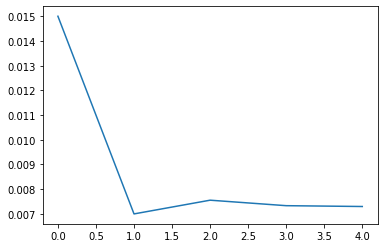

In [20]:
plt.plot(pflist)
plt.show()

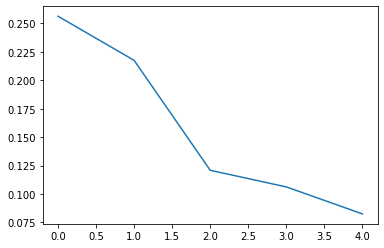

In [21]:
plt.plot(covlist)
plt.show()

In [32]:
pflist

array([0.015     , 0.007     , 0.00755556, 0.00733333, 0.0073    ])

In [33]:
covlist

array([0.25625508, 0.21745279, 0.12080882, 0.10620877, 0.08245796])

Is it that easy? Yes it is! But the problems are:
* MC simulation requires A LOT of simulation. What if a single evaluation takes 3 hours? 
* However, because usually the value of PoF is very small, it's quite hard to get an accurate model. 
* To make the process faster we need other methods to replace the evaluation process (e.g. polynomial chaos expansion and Gaussian Process Regression). Kriging/Gaussian Process Regression is one of the widely used method in modern structural reliability analysis.


---
---
## Sensitivity Analysis

What is the objective of SA?
- Quantify the influence of the input variables to the system's response

Why we need sensitivity analysis?
- Analyze how much the inputs affect the output.
- Identify which variable has the greatest and the least effect to the output.

How can we perform SA?
- Using partial derivative of the system model w.r.t the inputs (local sensitivity analysis).
    - But the result is "local".
    - Can only represent the sensitivity around particular point.
- Varying one variable while keep the other variables fixed. 
    - Then evaluate how the output respond to the varying input.
    - Repeat for each variables
- Using that so-called "Importance Measures"
    - Rely on fitting a model to the output and examine the model.
    - For example we could fit the data to a regression model, then examine the regression coefficient; but how about if the function is nonlinear?
    - Or we could use variance-based sensitivity Analysis called [Sobol Indices](https://en.wikipedia.org/wiki/Variance-based_sensitivity_analysis) (in fact, this is the most widely used SA technique).
- Using visual inspection:
    - Plot each variable and how it interacts with the output variable

---
### Sobol Indices

- Variance-based sensitivity analysis.
- Why we use this method:
    - It's a global method (Measure sensitivity across the whole input space)
    - It can deal with nonlinear responses.
    - It can measure in non-additive systems

> Note: In this session, the math behind the method will not be discussed. If you are interested, we recommend to read the 4th chapter of this book: [Global Sensitivity Analysis: The Primer](https://onlinelibrary.wiley.com/doi/book/10.1002/9780470725184)

Before we move to the main code, we'll need to install [sobol sampling](https://pypi.org/project/sobolsampling/) Python package. 

In [22]:
!pip install sobolsampling

     |████████████████████████████████| 678 kB 25.5 MB/s 


Now, let's make a function for wrapping the sobol sampling, and make it more convenient for later use:

In [23]:
from sobolsampling.sobol_new import sobol_points

def realval(lb,ub,samp):
    """
    Function to convert normalized value to 'real' value, given the upper and lower bound
    """
    # Input defense
    if len(ub) != len(lb):
        raise ValueError("Lower and upper bound have to be in the same dimension")
    if len(ub) != np.size(samp,axis=1):
        print(len(ub))
        print(np.size(samp,axis=1))
        raise ValueError("sample and bound are not in the same dimension")
    
    # Initiating variables
    ndim = len(ub)
    nsamp = np.size(samp,axis=0)
    realsamp = np.zeros(shape=[nsamp,ndim])
    
    # Calculating real value using loop. Why? Because why not? lol
    for i in range(0, ndim):
        for j in range(0, nsamp):
            realsamp[j, i] = (samp[j, i] * (ub[i] - lb[i])) + lb[i]
    return realsamp

def sobol_samp(nvar,nsamp,result='normalized',upbound=None,lobound=None):
    samplenorm = sobol_points(nsamp+1, nvar)
    samplenorm = samplenorm[1:,:]

    if result.lower() == "real" and lobound is not None and upbound is not None:
        checker = upbound - lobound;
        for numbers in checker:
            if numbers < 0:
                raise ValueError("Upper bound must bigger than lower bound!")
        sample_real = realval(lobound, upbound, samplenorm)
    elif result.lower() == "real" and (lobound is None or upbound is None):
        raise ValueError("lb and ub must have value")

    if result.lower() == "real":
        return sample_real
    else:
        return samplenorm



Now, here's the code for sensitivity analysis

In [24]:
from copy import deepcopy

class SobolIndices:
    """
    Create Sobol Indices for sensitivity analysis
    """

    def __init__(self, nvar, krigobj=None, problem=None, ub=None, lb=None, nMC=1e6):
        """
        Initialize model
        Args:
            nvar (int):  Number of variables.
            krigobj (object): Kriging object, default to None.
            problem (callable/None): problem type, default to None.
        """
        self.nvar = nvar
        self.krigobj = krigobj
        self.problem = problem
        self.n = int(nMC)
        if ub is not None and lb is not None:
            init_mat = sobol_samp(self.nvar*2, self.n, result="real", upbound=np.hstack((ub, ub)), lobound=np.hstack((lb, lb)))
        else:
            init_mat = sobol_samp(self.nvar*2, self.n)
        self.A = init_mat[:, :self.nvar]
        self.B = init_mat[:, self.nvar:]
        del init_mat
        self.ya = None
        self.yb = None
        self.fo_2 = None
        self.denom = None

    def analyze(self,first=True,total=False,second=False):
        """
        Run sensitivity analysis
        Args:
            first (bool): calculate first order or not
            total (bool): calculate total order or not
        Return:
             indices (dictionary): dictionary containing the sobol indices
        """
        if self.krigobj is not None:
            nsamp = np.size(self.A, axis=0)
            self.ya = np.zeros(shape=[nsamp, 1])
            if nsamp <= 10000:
                self.ya = self.krigobj.predict(self.A, ['pred'])
            else:
                run_times = int(np.ceil(nsamp / 10000))
                for i in range(run_times):
                    start = i * 10000
                    stop = (i + 1) * 10000
                    if i != (run_times - 1):
                        self.ya[start:stop, :] = self.krigobj.predict(self.A[start:stop, :], ['pred'])
                    else:
                        self.ya[start:, :] = self.krigobj.predict(self.A[start:, :], ['pred'])

            self.yb = np.zeros(shape=[nsamp, 1])
            if nsamp <= 10000:
                self.yb = self.krigobj.predict(self.B, ['pred'])
            else:
                run_times = int(np.ceil(nsamp / 10000))
                for i in range(run_times):
                    start = i * 10000
                    stop = (i + 1) * 10000
                    if i != (run_times - 1):
                        self.yb[start:stop, :] = self.krigobj.predict(self.B[start:stop, :], ['pred'])
                    else:
                        self.yb[start:, :] = self.krigobj.predict(self.B[start:, :], ['pred'])

        elif self.krigobj is None and self.problem is not None:
            if not callable(self.problem):
                raise TypeError ("self.problem must be callable")
            else:
                self.ya = self.problem(self.A)
                self.yb = self.problem(self.B)
        else:
            raise ValueError("Either krigobj or problem must be not None")

        self.fo_2 = (np.sum(self.ya)/self.n)**2
        self.denom = (np.sum(self.ya**2)/self.n) - self.fo_2

        indices = dict()
        if first is True or total is True:
            indices["first"],indices["total"] = self.calc_ft_order(first,total)

        if second is True:
            indices["second"] = self.calc_second_order(indices["first"])
        elif second is True and first is False:
            indices["first"],indices["total"] = self.calc_ft_order(True,True)
            indices["second"] = self.calc_second_order(indices["first"])
        else:
            pass

        return indices

    def calc_ft_order(self,first=True,total=False):
        """
        Calculate first and total order Sobol Indices
        Return:
            s1 (numpy array): 1st order sobol indices.
        """
        s1 = np.zeros(self.nvar)
        st = np.zeros(self.nvar)

        for ii in range(self.nvar):
            C_i = deepcopy(self.B)
            C_i[:,ii] = self.A[:,ii]

            # Use Kriging to predict Monte-Carlo
            if self.krigobj is not None:
                nsamp = np.size(C_i, axis=0)
                yci = np.zeros(shape=[nsamp, 1])
                if nsamp <= 10000:
                    yci = self.krigobj.predict(C_i, ['pred'])
                else:
                    run_times = int(np.ceil(nsamp / 10000))
                    for i in range(run_times):
                        start = i * 10000
                        stop = (i + 1) * 10000
                        if i != (run_times - 1):
                            yci[start:stop, :] = self.krigobj.predict(C_i[start:stop, :], ['pred'])
                        else:
                            yci[start:, :] = self.krigobj.predict(C_i[start:, :], ['pred'])

            elif self.krigobj is None and self.problem is not None:
                if not callable(self.problem):
                    raise TypeError ("self.problem must be callable")
                else:
                    yci = self.problem(C_i)

            if first:
                s1[ii] = ((1/self.n)*np.sum(self.ya*yci) - self.fo_2)/self.denom
            if total:
                st[ii] = 1 - (((1 / self.n) * np.sum(self.yb * yci) - self.fo_2) / self.denom)

        return [s1,st]

    def calc_second_order(self,s1):
        """
        Calculate second order indices
        :return:
        """
        s2 = dict()

        for ii in range(self.nvar-1):
            for jj in range(ii+1, self.nvar):
                C_ij = deepcopy(self.B)
                C_ij[:, ii] = self.A[:, ii]
                C_ij[:, jj] = self.A[:, jj]

                # Use Kriging to predict Monte-Carlo
                if self.krigobj is not None:
                    nsamp = np.size(C_ij, axis=0)
                    yci = np.zeros(shape=[nsamp, 1])
                    if nsamp <= 10000:
                        yci = self.krigobj.predict(C_ij, ['pred'])
                    else:
                        run_times = int(np.ceil(nsamp / 10000))
                        for i in range(run_times):
                            start = i * 10000
                            stop = (i + 1) * 10000
                            if i != (run_times - 1):
                                yci[start:stop, :] = self.krigobj.predict(C_ij[start:stop, :], ['pred'])
                            else:
                                yci[start:, :] = self.krigobj.predict(C_ij[start:, :], ['pred'])

                elif self.krigobj is None and self.problem is not None:
                    if not callable(self.problem):
                        raise TypeError ("self.problem must be callable")
                    else:
                        yci = self.problem(C_ij)

                vij =  ((1/self.n)*np.sum(self.ya*yci) - self.fo_2)
                key = "x"+str(ii+1)+"-x"+str(jj+1)
                s2[key] = (vij/self.denom) - s1[ii] - s1[jj]

        return s2

### Test Cases

Now, we'll take a look how Sobol Indices works on some test cases:

#### 1. Function without interactions between variables

Let's suppose that we have a function:
$$
y = x_1 + x_2 + x_3
$$

As we can see that the each input variables has the same coefficient. Which means that $x_1$ shares the same amount of contribution with $x_2$ and $x_3$ to the output $y$.

In [25]:
y = lambda x: x[:,0] + x[:,1] + x[:,2]

Now, let's see the Sobol Indices.

In [26]:
upbound = np.array([10,10,10])
lobound = np.array([0,0,0])

testSA = SobolIndices(nvar = 3, problem = y, ub = upbound, lb = lobound, nMC = 1e6)
result = testSA.analyze(True,True,True)

result

{'first': array([0.33333369, 0.33333675, 0.33333435]),
 'second': {'x1-x2': -2.3909969139590537e-06,
  'x1-x3': -2.3909969208424364e-06,
  'x2-x3': -2.390996915124788e-06},
 'total': array([0.33331792, 0.33331326, 0.33331515])}

Now, how do we interpret this result? There are three terms in the result:
- First order: The contribution of each variable alone (e.g the contribution of $x_2$ to $y$)
- Second order: The contribution of the interaction between 2 variables (e.g how the interaction between x1 and x3 affects the output)
- Total order: Contribution made by a single variable and the interactions between that variable with the others. For example, the total order of $x_2$ is equal to the first order of $x_2$ plus the second order and other higher orders and higher order interactions. ($STotal_{x2} \approx S_{x2} + S_{x1-x2} + S_{x2-x3} + S_{x1-x2-x3}$)

#### 2. Function with interactions between variables

$$
y = 4x_1 + 10 x_1 x_2 + 0.25 x_3
$$

In [27]:
y = lambda x: 4*x[:,0] + 10 * x[:,0] * x[:,1] + 0.25*x[:,2]

In [28]:
upbound = np.array([10,10,10])
lobound = np.array([0,0,0])

testSA = SobolIndices(nvar = 3, problem = y, ub = upbound, lb = lobound, nMC = 1e6)
result = testSA.analyze(True,True,True)

result

{'first': array([4.66606775e-01, 4.00039502e-01, 7.31641301e-06]),
 'second': {'x1-x2': 0.13334373133963906,
  'x1-x3': 2.6750492868086836e-06,
  'x2-x3': 2.675049284810282e-06},
 'total': array([5.99948600e-01, 5.33390914e-01, 5.48071691e-06])}

#### 3. Now, let's try with our bridge structure problem

Please beware that the cost of evaluating first and total order would be:
$$
n_{MC} \times (n_{var} + 2)
$$

And if we want to evaluate the 2nd order the cost will be:
$$
n_{MC} \times (\sum_{i=1}^{n_{var}} i + 2)
$$

> Note: The evaluation of 200,000 monte carlo samples could take more than 12 hours in google colab. We'll try with 1,000 first.

In [29]:
x = randvars(n = 1e6)

In [30]:
def run_bridge(x):
    y = []
    num_tri = 6
    for ii in range(len(x)):
        Ediag = np.ones(shape=num_tri) * x[ii,1]
        Adiag = np.ones(shape=num_tri) * x[ii,3]
        Ebot = np.ones(shape=num_tri) * x[ii,0]
        Abot = np.ones(shape=num_tri) * x[ii,2]
        Etop = np.ones(shape=num_tri - 1) * x[ii,0]
        Atop = np.ones(shape=num_tri - 1) * x[ii,2]
        p = -x[ii,4:10]
        res = trussbridge(Ediag,Adiag,Ebot,Abot,Etop,Atop,p)
        y.append(res['uy'])
    y = np.array(y)
    return y.reshape(-1,1)

In [31]:
import time

upbound = np.max(x, axis=0)
lobound = np.min(x, axis=0)

t0 = time.time()
testSA = SobolIndices(nvar = 10, problem = run_bridge, ub = upbound, lb = lobound, nMC = 5e4)
result = testSA.analyze(True,True,False)
print(f'elapsed time: {time.time() - t0} s')

for key in result.keys():
    print(f'{key} :')
    if type(result[key]) is not dict:
        print(result[key])
    else:
        pass

KeyboardInterrupt: ignored

In [ ]:
# Plotting SA with 50,000 MC
# Pre-run
first_label = ['S'+str(i) for i in range (1,11)]
total_label = ['ST'+str(i) for i in range (1,11)]

plt.bar(first_label, result['first'])
plt.show()
plt.bar(total_label, result['total'])
plt.show()